<a href="https://colab.research.google.com/github/RaghavAgrawal17/Threat-detection-using-NLP-and-DAG-creation/blob/main/Threat_detection_using_NLP_and_creating_DAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import nltk
import spacy
import os
import string
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt

In [ ]:
os.chdir(r'/TOC')  #don't remove r and give extra space
myFiles = glob.glob('*.txt')
#print(myFiles)  #prints text file names

dict_words={}
nltk.download('punkt')
nltk.download('stopwords')

for filename in myFiles:
    file = open(filename, 'rt')
    text = file.read()
    #print(filename)
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word 
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words=list(set(words))
    dict_words[filename]=words
    words=[]
    file.close() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#print(dict_words)

B = pd.read_csv('/BlacklistedFile1.csv')
#print(B)

value=B['Index'].tolist()
key=B['Sensitivity'].tolist()

#print(value)
#print(key)

Ref_dict=dict(zip(value,key))
#print(Ref_dict)      #Data Dictionary


# Clustering
less_sensitive=[]
avg_sensitive=[]
high_sensitive=[]

In [ ]:
for name, words in dict_words.items():
    max=0
    for x in words:
        if(max==3):
            break
        for value, key in Ref_dict.items():
            if(x==value):
                if(max<key):
                    max=int(key)
                if(max==3):
                    print(name,"has High Senstive data")
                    high_sensitive.append(name)
                    break
    if(max==0):
        print(name,"has No Sensitive data")
    if(max==1):
        print(name,"has Less Sensitive data")
        less_sensitive.append(name)
    if(max==2):
        print(name,"has Average Sensitive data")
        avg_sensitive.append(name)
                
print()
print("CLUSTER LESS-SENSITIVE:",less_sensitive)
print("CLUSTER AVG-SENSITIVE:",avg_sensitive)
print("CLUSTER HIGH-SENSITIVE:",high_sensitive)

DataTOC9.txt has Less Sensitive data
DataTOC4.txt has Average Sensitive data
DataTOC8.txt has No Sensitive data
DataTOC5.txt has High Senstive data
DataTOC6.txt has High Senstive data
DataTOC3.txt has Average Sensitive data
DataTOC7.txt has High Senstive data
DataTOC2.txt has Average Sensitive data
DataTOC1.txt has High Senstive data

CLUSTER LESS-SENSITIVE: ['DataTOC9.txt']
CLUSTER AVG-SENSITIVE: ['DataTOC4.txt', 'DataTOC3.txt', 'DataTOC2.txt']
CLUSTER HIGH-SENSITIVE: ['DataTOC5.txt', 'DataTOC6.txt', 'DataTOC7.txt', 'DataTOC1.txt']


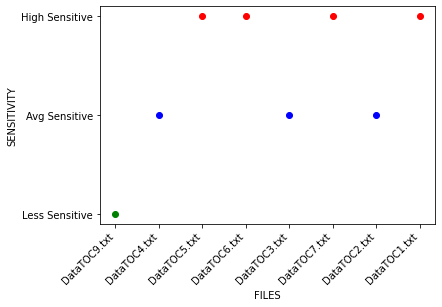

In [ ]:
x=myFiles
y=[]
for i in x:
    if(i in less_sensitive):
        y.append(1)
    elif(i in avg_sensitive):
        y.append(2)
    elif(i in high_sensitive):
        y.append(3)
    else:
        y.append(None)
plt.yticks([1,2,3],["Less Sensitive","Avg Sensitive","High Sensitive"])
plt.xticks(rotation=45, ha='right')
plt.ylabel("SENSITIVITY")
plt.xlabel("FILES")
for i in range(0,len(x)):
    if(y[i]==3):
        plt.scatter(x[i],y[i],color="red")
    if(y[i]==2):
        plt.scatter(x[i],y[i],color="blue")
    if(y[i]==1):
        plt.scatter(x[i],y[i],color="green")


In [ ]:
!pip install --upgrade spacy

     |████████████████████████████████| 12.8MB 271kB/s 
     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 1.1MB 43.9MB/s 
     |████████████████████████████████| 460kB 46.8MB/s 
     |████████████████████████████████| 9.1MB 43.3MB/s 
     |████████████████████████████████| 122kB 54.4MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=49cf78c1897824400e8a6fe9d2d83993b0ea2d9f4eb2286556535a5991248106
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-5.0.0
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree,tree2conlltags
from pprint import pprint
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


from spacy import displacy
from collections import Counter


nlp_updated = spacy.load('/trained_data_model')

def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    return sent


for filename in high_sensitive:
    file = open(filename, 'rt')
    text = file.read()
    sent = preprocess(text)
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent)
    iob_tagged = tree2conlltags(cs)
    # pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
    doc=nlp_updated(text)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    len(doc.ents)
    labels = [x.label_ for x in doc.ents]
    Counter(labels)
    items = [x.text for x in doc.ents]
    print(Counter(items).most_common(3))
    
    sentences = [x for x in doc.sents]
    displacy.render(nlp_updated(str(sentences[20])),jupyter=True, style='ent')
    displacy.render(nlp_updated(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})
    
    [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp_updated(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
    dict([(str(x), x.label_) for x in nlp_updated(str(sentences[20])).ents])
    print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])
    file.close()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[('WELS', 196), ('ISLAND', 23), ('R14', 12)]


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[(ADAMS, 'O', ''), (
, 'O', '')]
[('.', 84), ('V.S.A.', 12), ('National', 12)]


[( , 'O', '')]
[('.', 3595), ('code', 100), ('.1', 61)]


[(.1, 'B', 'I-relevant_term'), (

, 'O', ''), (Section, 'B', 'I-application'), (II, 'B', 'B-relevant_term'), (-, 'I', 'B-relevant_term'), (General, 'I', 'B-relevant_term'), (Procedures, 'I', 'B-relevant_term'), (for, 'O', ''), (Electronic, 'O', ''), (Files, 'B', 'B-relevant_term'), (., 'B', 'B-relevant_term'), (., 'B', 'I-relevant_term')]
[('.', 23), ('value', 13), ('information', 11)]


[(You, 'O', ''), (should, 'O', ''), (require, 'O', ''), (that, 'O', ''), (a, 'O', ''), (
, 'O', ''), (publicly, 'O', ''), (traded, 'O', ''), (firm, 'O', ''), (obtain, 'B', 'B-relevant_term'), (an, 'O', ''), (MAI, 'O', ''), (appraisal, 'O', ''), (,, 'O', ''), (that, 'O', ''), (is, 'O', ''), (,, 'O', ''), (an, 'O', ''), (independent, 'O', ''), (
, 'O', ''), (appraisal, 'O', ''), (from, 'O', ''), (a, 'O', ''), (licensed, 'O', ''), (appraiser, 'O', ''), (,, 'O', ''), (of, 'O', ''), (its, 'O', ''), (properties, 'O', ''), (,, 'O', ''), (and, 'O', ''), (include, 'O', ''), (that, 'O', ''), (
, 'O', ''), (appraisal, 'O', ''), (in, 'O', ''), (its, 'O', ''), (annual, 'O', ''), (report, 'O', ''), (and, 'O', ''), (the, 'O', ''), (SEC, 'O', ''), (filings, 'O', ''), (required, 'O', ''), (in, 'O', ''), (this, 'O', ''), (rule, 'O', ''), (., 'O', '')]


In [ ]:
for filename in avg_sensitive:
    file = open(filename, 'rt')
    text = file.read()
    sent = preprocess(text)
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent)
    iob_tagged = tree2conlltags(cs)
    # pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
    doc=nlp_updated(text)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    len(doc.ents)
    labels = [x.label_ for x in doc.ents]
    Counter(labels)
    items = [x.text for x in doc.ents]
    print(Counter(items).most_common(3))
    
    sentences = [x for x in doc.sents]
    displacy.render(nlp_updated(str(sentences[20])),jupyter=True, style='ent')
    displacy.render(nlp_updated(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})
    
    [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp_updated(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
    dict([(str(x), x.label_) for x in nlp_updated(str(sentences[20])).ents])
    print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])
    file.close()

[('service', 52), ('.', 13), ('54.307', 9)]


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[(*, 'O', '')]
[('Plan', 143), ('02/28/05', 46), ('04/27/05', 31)]


[(	, 'O', ''), (11/18/04, 'B', 'B-version'), (															
, 'O', ''), (", 'O', ''), (Kent, 'O', ''), (,, 'O', ''), (city, 'O', ''), (,, 'O', ''), (All, 'O', ''), (-, 'O', ''), (Hazards, 'O', ''), (Mitigation, 'O', ''), (Plan, 'B', 'B-relevant_term'), (", 'O', ''), (	, 'O', ''), (M, 'O', ''), (	, 'O', ''), (Kent, 'O', ''), (	, 'O', ''), (01/27/05, 'O', ''), (															
, 'O', ''), (", 'O', ''), (Kent, 'O', ''), (,, 'O', ''), (city, 'O', ''), (,, 'O', ''), (All, 'O', ''), (-, 'O', ''), (Hazards, 'O', ''), (Mitigation, 'O', ''), (Plan, 'B', 'B-relevant_term'), (", 'O', ''), (	, 'O', ''), (M, 'O', ''), (	, 'O', ''), (King, 'O', ''), (County, 'O', ''), (FPD, 'O', ''), (#, 'O', ''), (37, 'O', ''), (  	, 'O', ''), (01/27/05, 'O', ''), (															
, 'O', ''), (King, 'O', ''), (Regional, 'O', ''), (Hazard, 'O', ''), (MIT, 'O', ''), (Plan, 'B', 'B-relevant_term'), (	, 'O', ''), (M, 'O', ''), (	, 'O', ''), (Auburn, 'O', ''), (	, 'O', ''), (11/01/04, 'O', '')]
[('.', 38), ('Haemaphys

[(During, 'O', ''), (the, 'O', ''), (same, 'O', ''), (period, 'O', ''), (,, 'O', ''), (45, 'B', 'B-version'), (cases, 'O', ''), (of, 'O', ''), (human, 'O', ''), (tick, 'O', ''), (bites, 'O', ''), (were, 'O', ''), (
, 'O', ''), (recorded, 'O', ''), (in, 'O', ''), (this, 'O', ''), (JSF, 'O', ''), (-, 'O', ''), (endemic, 'O', ''), (area, 'O', ''), (in, 'O', ''), (the, 'O', ''), (same, 'O', ''), (hospital, 'O', ''), (., 'O', '')]


In [ ]:
import tqdm.notebook as tq
import networkx as nx
from spacy.matcher import Matcher


                                               source  ...                                    edge
0                                                      ...                                   Title
1                                                      ...                          Online_Linkage
2                                                      ...                                 Reports
3                                                      ...                                 Reports
4                                  1983 Upper Neogene  ...                                 Reports
5                                                      ...                              Testarmata
6                                                      ...                                 Reports
7                                                      ...                                 Reports
8                                                      ...                               Robertson
9        

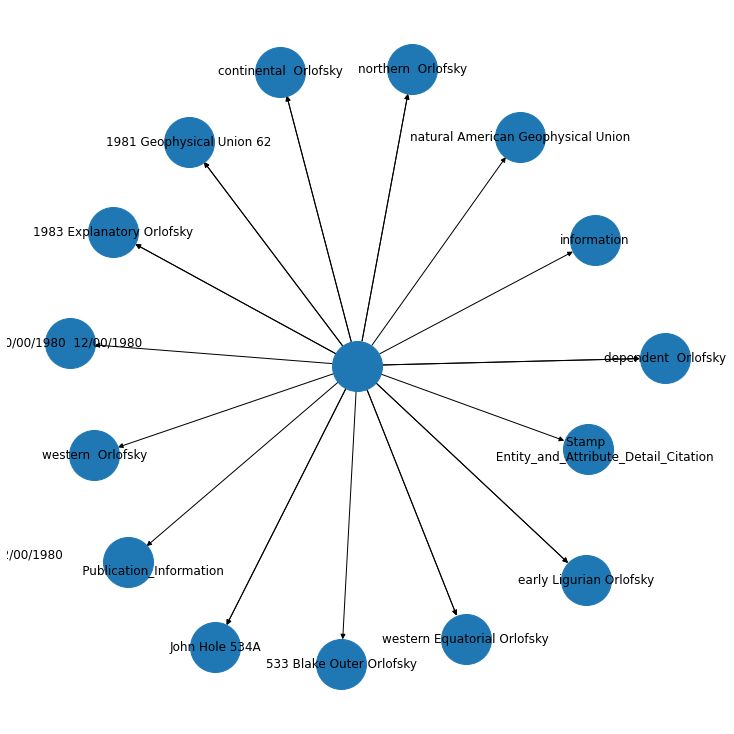

In [ ]:
for filename in less_sensitive:
    file = open(filename, 'rt')
    text = file.read()
    sent = preprocess(text)
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent)
    iob_tagged = tree2conlltags(cs)
    # pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
    doc=nlp_updated(text)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    len(doc.ents)
    labels = [x.label_ for x in doc.ents]
    Counter(labels)
    items = [x.text for x in doc.ents]
    # print(Counter(items).most_common(3))
    
    sentences = [x for x in doc.sents]
    # print(sentences[0])


    def get_entity(sent):
      ent1 = "" #subject entity
      ent2 = "" #object entity

      prev_token_text = "" #text from previous token
      prev_token_dep = ""  #depedency from previous token

      prefix = ""
      modifier = ""

      for tok in nlp_updated(sent):
        #Go in only if it is not a punctuation, else next word
        if tok.dep_ != "punct":
          #Check if token is a compund word
          if tok.dep_ == "compound":
            prefix = tok.text
            #Check if previous token is also a compound
            if prev_token_dep == "compound":
              prefix = prev_token_text + " "+ prefix
          #Check if token is a modifier or not
          if tok.dep_.endswith("mod")==True:
            modifier = tok.text 
            #Check if previous token is a compound
            if prev_token_dep == "compound":
              modifier = prev_token_text + " " + modifier

          #Checking if subject
          if tok.dep_.find("subj") == True:
            ent1 =modifier+ " " + prefix + " " + tok.text
            prefix = ""
            modifer = ""
          #Checking if object
          if tok.dep_.find("obj") == True:
            ent2 =modifier+ " " + prefix + " " + tok.text
            prefix = ""
            modifer = ""

          #Update variables
          prev_token_text = tok.text
          prev_token_dep = tok.dep_

      ############################
      return [ent1.strip(), ent2.strip()]


    entity_pairs = []
    for i in tq.tqdm(sentences):
      entity_pairs.append(get_entity(str(i)))
    tq.tqdm._instances.clear()

    subjects = []
    objects = []
    subjects = [x[0] for x in entity_pairs]
    objects = [x[1] for x in entity_pairs]


    def get_relation(sent):
      doc = nlp_updated(sent)
      #We initialise matcher with the vocab
      matcher = Matcher(nlp_updated.vocab)
      #Defining the pattern
      pattern = [{'DEP':'ROOT'},{'DEP':'prep','OP':'?'},{'DEP':'agent','OP':'?'},{'DEP':'ADJ','OP':'?'}]
      #Adding the pattern to the matcher
      matcher.add("matcher_1",[pattern])
      #Applying the matcher to the doc
      matches = matcher(doc)

      #The matcher returns a list of (match_id, start, end). The start to end in our doc contains the relation. We capture that relation in a variable called span
      span = doc[matches[0][1]:matches[0][2]]
      return span.text


    relations = [get_relation(str(i)) for i in tq.tqdm(sentences)]
    tq.tqdm._instances.clear()

    #print(pd.Series(subjects).value_counts()[:10])
    #print(pd.Series(relations).value_counts()[:10])


    entity_pairs2 = entity_pairs
    relations2 = relations
    #We keep relations only for those entities whose both source and target are present
    entity_pairs3 = []
    relations3 = []
    for i in tq.tqdm(range(len(entity_pairs2))):
      if entity_pairs2[i][0]!='' and entity_pairs2[i][1]!='':
        entity_pairs3.append(entity_pairs2[i])
        relations3.append(relations2[i])
    tq.tqdm._instances.clear()

    source = []
    target = []
    edge = []
    for i in (range(len(entity_pairs))):
      doc_source = nlp_updated(entity_pairs[i][0]).ents #Getting the named entities for source
      #Converting the named entity tuple to String
      str_source = [str(word) for word in doc_source]
      doc_source = ' '.join(str_source)
      doc_target = nlp_updated(entity_pairs[i][1]).ents #Getting the named entities for target
      #Converting the named entity tuple to String
      str_target = [str(word) for word in doc_target]
      doc_target = ' '.join(str_target)
      if doc_source != '' or doc_target != '':
        edge.append(relations[i])
        source.append(entity_pairs[i][0])
        target.append(entity_pairs[i][1])

    knowledge_graph_df = pd.DataFrame({'source':source, 'target':target, 'edge':edge})
    print(knowledge_graph_df)
    #MultiDIGRaph because its a directional graph

    
    G = nx.from_pandas_edgelist(knowledge_graph_df[knowledge_graph_df['source']==""],source = 'source', target = 'target', edge_attr = True, create_using= nx.MultiDiGraph())
    #MultiDIGRaph because its a directional graph
    plt.figure(figsize = (10,10))
    pox = nx.spring_layout(G,k = 1.0) #k defines the distnace between nodes
    nx.draw(G, with_labels= True, node_size = 2500)
    plt.show()
    

    displacy.render(nlp_updated(str(sentences[20])),jupyter=True, style='ent')
    displacy.render(nlp_updated(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})
    
    [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp_updated(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
    dict([(str(x), x.label_) for x in nlp_updated(str(sentences[20])).ents])
    # print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])
    
    file.close()